In [6]:
import requests
import pandas as pd

# 1. URL correta (raw do GitHub)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# 2. Fazer a requisição GET
response = requests.get(url)

# 3. Verificar se a resposta foi bem-sucedida
if response.status_code == 200:
    dados = response.json()  # Converte para dicionário/lista em Python

    # 4. Converter para DataFrame
    df = pd.DataFrame(dados)

    # 5. Exibir os 5 primeiros registros
    print(df.head())
else:
    print(f"Erro ao acessar API: {response.status_code}")



   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

1. Explorar as colunas e verificar tipos de dados

In [8]:
import requests
import pandas as pd

# URL raw do JSON no GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Requisição
response = requests.get(url)
dados = response.json()

# Criar DataFrame
df = pd.DataFrame(dados)

# Ver os tipos de dados de cada coluna
print(df.dtypes)

# Resumo completo (linhas, colunas, tipos, valores nulos)
print(df.info())


customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


2. Inspeção


In [10]:
import requests
import pandas as pd

# ==========================
# 1. Carregar os dados da API (GitHub raw)
# ==========================
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
dados = response.json()

# Normalizar se houver dicionários aninhados
df = pd.json_normalize(dados)

print("\n✅ Dataset carregado e normalizado com sucesso!")
print("Dimensão:", df.shape)

# ==========================
# 2. Informações iniciais
# ==========================
print("\n📋 Informações do DataFrame:")
print(df.info())

print("\nTipos de dados:")
print(df.dtypes)

# ==========================
# 3. Verificação de valores ausentes
# ==========================
print("\n🔎 Valores ausentes (contagem):")
print(df.isnull().sum())

print("\n% de valores ausentes por coluna:")
print((df.isnull().mean() * 100).round(2))

# ==========================
# 4. Verificação de duplicados
# ==========================
try:
    duplicados = df.duplicated().sum()
    print(f"\n📌 Registros duplicados encontrados: {duplicados}")
    if duplicados > 0:
        df = df.drop_duplicates()
        print("→ Duplicados removidos.")
except TypeError:
    print("\n⚠️ Algumas colunas têm listas/dicionários. Ignorando checagem de duplicados.")

# ==========================
# 5. Conversão de colunas numéricas
# ==========================
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    print(f"\n⚠️ Valores inválidos em 'TotalCharges' após conversão: {df['TotalCharges'].isnull().sum()}")

# ==========================
# 6. Padronização de categorias (object)
# ==========================
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

print("\n🔑 Categorias únicas após padronização:")
for col in df.select_dtypes(include="object").columns[:5]:  # mostra só 5 primeiras para não poluir
    print(f"\nColuna: {col}")
    print(df[col].value_counts(dropna=False).head(10))

# ==========================
# 7. Resumo final
# ==========================
print("\n📊 Dataset após limpeza:")
print(df.info())
print("Dimensão final:", df.shape)
print("Colunas:", df.columns.tolist())



✅ Dataset carregado e normalizado com sucesso!
Dimensão: (7267, 21)

📋 Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  intern

3. Correções



In [11]:
import requests
import pandas as pd

# ==========================
# 1. Carregar e normalizar os dados
# ==========================
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
dados = response.json()

df = pd.json_normalize(dados)  # normaliza estruturas aninhadas
print("✅ Dados carregados. Dimensão inicial:", df.shape)

# ==========================
# 2. Remover duplicados (se possível)
# ==========================
try:
    df = df.drop_duplicates()
    print("→ Duplicados removidos.")
except TypeError:
    print("⚠️ Algumas colunas têm listas/dicionários. Duplicados ignorados.")

# ==========================
# 3. Ajustar colunas numéricas
# ==========================
# Converter TotalCharges para float
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Se houver valores nulos em TotalCharges (clientes recém-entrados), preenche com 0
if "TotalCharges" in df.columns:
    df["TotalCharges"].fillna(0, inplace=True)

# ==========================
# 4. Ajustar colunas categóricas
# ==========================
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Padronizar Churn para "yes" / "no"
if "churn" in df.columns:
    df["churn"] = df["churn"].replace({"yes": 1, "no": 0})

# ==========================
# 5. Ajustar colunas inteiras
# ==========================
if "SeniorCitizen" in df.columns:
    df["SeniorCitizen"] = df["SeniorCitizen"].astype(int)

# ==========================
# 6. Tratar valores ausentes
# ==========================
# Excluir colunas com muitos NaN (opcional: threshold 40%)
limite = len(df) * 0.4
df = df.dropna(axis=1, thresh=limite)

# Preencher valores categóricos ausentes com "unknown"
for col in df.select_dtypes(include="object").columns:
    df[col].fillna("unknown", inplace=True)

# ==========================
# 7. Resumo final
# ==========================
print("\n📊 Dataset pronto para análise!")
print("Dimensão final:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)
print("\nValores ausentes restantes:")
print(df.isnull().sum().sum())


✅ Dados carregados. Dimensão inicial: (7267, 21)
→ Duplicados removidos.

📊 Dataset pronto para análise!
Dimensão final: (7267, 21)

Tipos de dados:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

Valores ausentes restantes:
0


/tmp/ipython-input-188183498.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("unknown", inplace=True)


4. Conta diária


In [13]:
import requests
import pandas as pd

# ==========================
# 1. Carregar e normalizar os dados
# ==========================
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
dados = response.json()

# Normaliza o JSON caso haja colunas aninhadas
df = pd.json_normalize(dados)
print("✅ Dados carregados e normalizados. Dimensão inicial:", df.shape)

# ==========================
# 2. Remover duplicados (se possível)
# ==========================
try:
    df = df.drop_duplicates()
    print("→ Duplicados removidos.")
except TypeError:
    print("⚠️ Algumas colunas têm listas/dicionários. Duplicados ignorados.")

# ==========================
# 3. Ajustar colunas numéricas
# ==========================
# Conferir nomes das colunas para encontrar o faturamento mensal
print("\nColunas disponíveis:", df.columns.tolist())

# Supondo que a coluna de faturamento seja 'MonthlyCharges' ou variante
faturamento_col = [col for col in df.columns if "monthly" in col.lower()]
if len(faturamento_col) == 0:
    raise KeyError("Não foi possível localizar a coluna de faturamento mensal!")
else:
    faturamento_col = faturamento_col[0]
    print(f"\nUsando '{faturamento_col}' como coluna de faturamento mensal.")

# Converter para numérico
df[faturamento_col] = pd.to_numeric(df[faturamento_col], errors="coerce")

# Preencher valores ausentes com 0
df[faturamento_col].fillna(0, inplace=True)

# ==========================
# 4. Criar coluna Contas_Diarias
# ==========================
df["Contas_Diarias"] = (df[faturamento_col] / 30).round(2)

# ==========================
# 5. Ajustar colunas categóricas
# ==========================
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Converter Churn para binário se existir
if "churn" in df.columns:
    df["churn"] = df["churn"].replace({"yes": 1, "no": 0})

# ==========================
# 6. Ajustar colunas inteiras
# ==========================
if "SeniorCitizen" in df.columns:
    df["SeniorCitizen"] = pd.to_numeric(df["SeniorCitizen"], errors="coerce").fillna(0).astype(int)

# ==========================
# 7. Tratar valores ausentes restantes
# ==========================
# Excluir colunas com muitos NaN (opcional: threshold 40%)
limite = len(df) * 0.4
df = df.dropna(axis=1, thresh=limite)

# Preencher valores categóricos ausentes com "unknown"
for col in df.select_dtypes(include="object").columns:
    df[col].fillna("unknown", inplace=True)

# ==========================
# 8. Resumo final
# ==========================
print("\n📊 Dataset pronto para análise!")
print("Dimensão final:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)
print("\nValores ausentes restantes:", df.isnull().sum().sum())
print("\nExemplo da nova coluna 'Contas_Diarias':")
print(df[["Contas_Diarias", faturamento_col]].head())


✅ Dados carregados e normalizados. Dimensão inicial: (7267, 21)
→ Duplicados removidos.

Colunas disponíveis: ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']

Usando 'account.Charges.Monthly' como coluna de faturamento mensal.

📊 Dataset pronto para análise!
Dimensão final: (7267, 22)

Tipos de dados:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64


/tmp/ipython-input-3265377669.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[faturamento_col].fillna(0, inplace=True)
/tmp/ipython-input-3265377669.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [14]:
# Análise descritiva das colunas numéricas
print("\n📊 Análise Descritiva das Colunas Numéricas:")
display(df.describe())

# Análise descritiva das colunas categóricas
print("\n📊 Análise Descritiva das Colunas Categóricas:")
display(df.select_dtypes(include='object').describe())

# Contagem de valores únicos para algumas colunas categóricas importantes
print("\n📊 Contagem de Valores Únicos para Colunas Categóricas:")
for col in ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'account.Contract', 'internet.InternetService']:
    if col in df.columns:
        print(f"\n--- {col} ---")
        display(df[col].value_counts())


📊 Análise Descritiva das Colunas Numéricas:


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2.157292
std,0.369074,24.571773,30.129572,1.004407
min,0.000000,0.000000,18.250000,0.610000
25%,0.000000,9.000000,35.425000,1.180000
50%,0.000000,29.000000,70.300000,2.340000
75%,0.000000,55.000000,89.875000,2.995000
max,1.000000,72.000000,118.750000,3.960000



📊 Análise Descritiva das Colunas Categóricas:


,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-hotoh,no,male,no,no,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11



📊 Contagem de Valores Únicos para Colunas Categóricas:

--- Churn ---


,count
Churn,
no,5174
yes,1869
,224



--- customer.gender ---


,count
customer.gender,
male,3675
female,3592



--- customer.Partner ---


,count
customer.Partner,
no,3749
yes,3518



--- customer.Dependents ---


,count
customer.Dependents,
no,5086
yes,2181



--- account.Contract ---


,count
account.Contract,
month-to-month,4005
two year,1743
one year,1519



--- internet.InternetService ---


,count
internet.InternetService,
fiber optic,3198
dsl,2488
no,1581


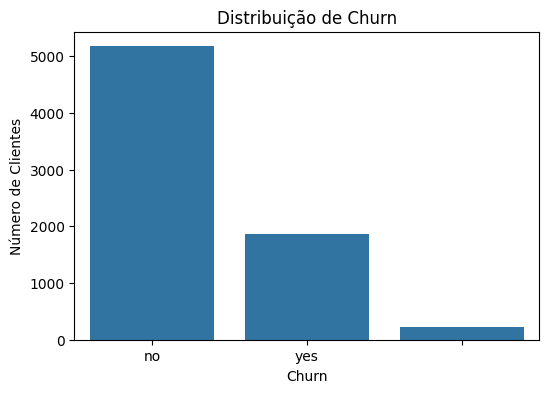


Proporção de Churn:
Churn
no     71.198569
yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem dos valores na coluna 'Churn'
churn_counts = df['Churn'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

# Mostrar a proporção em porcentagem
print("\nProporção de Churn:")
print(df['Churn'].value_counts(normalize=True) * 100)

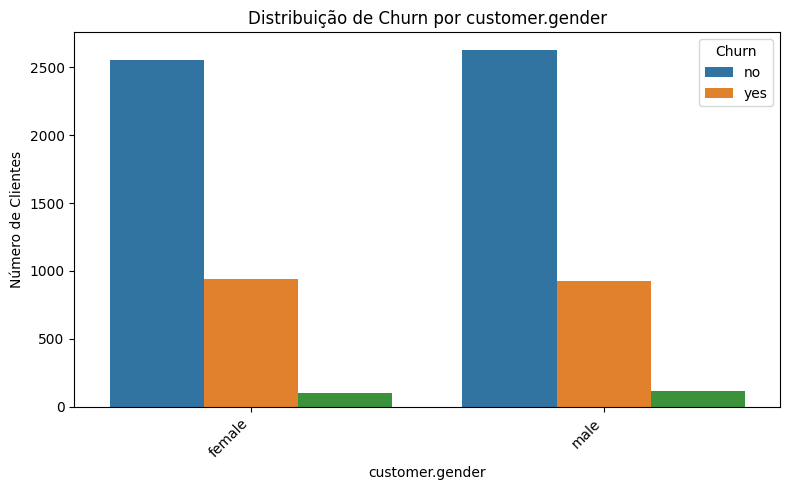

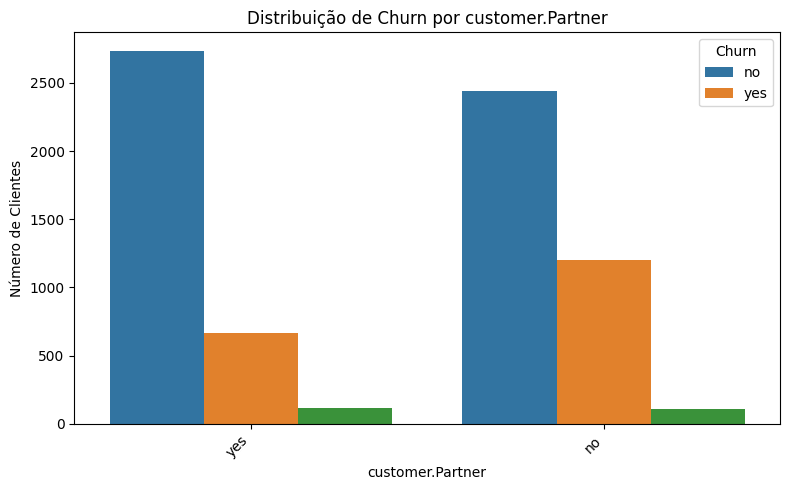

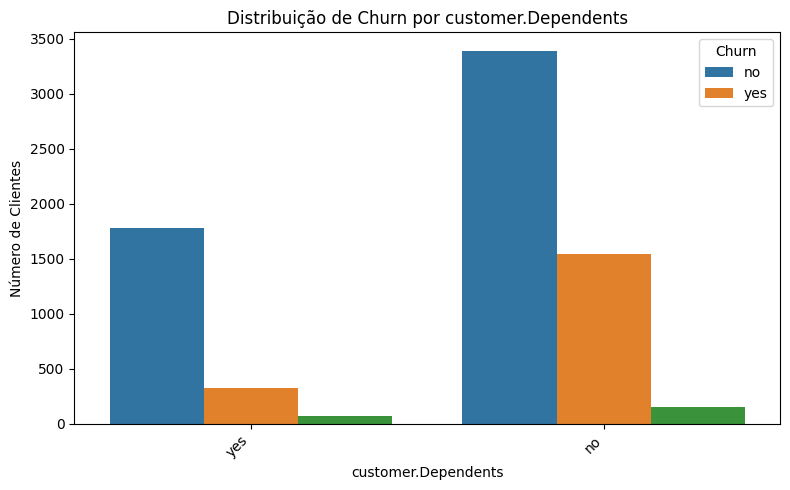

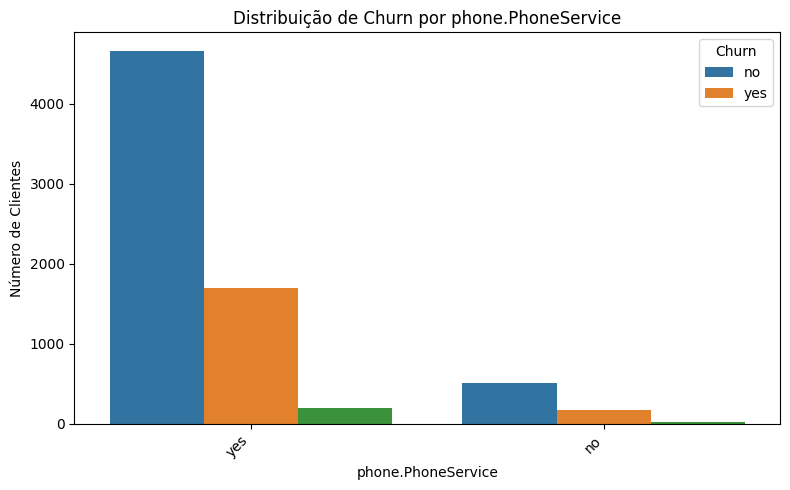

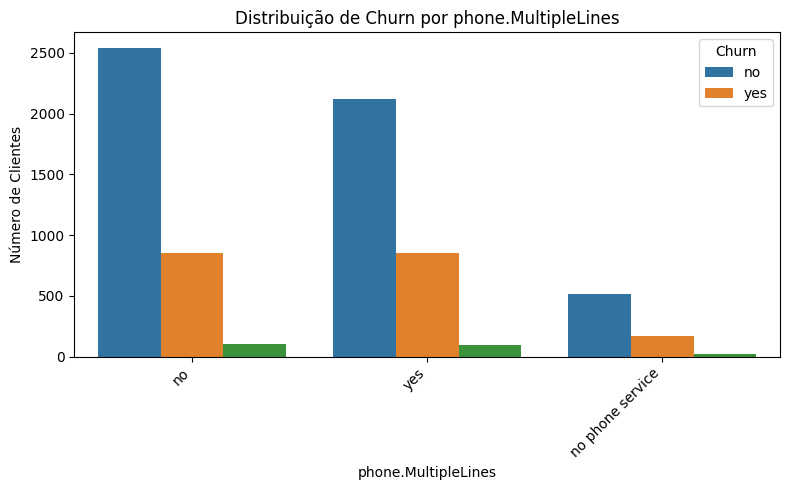

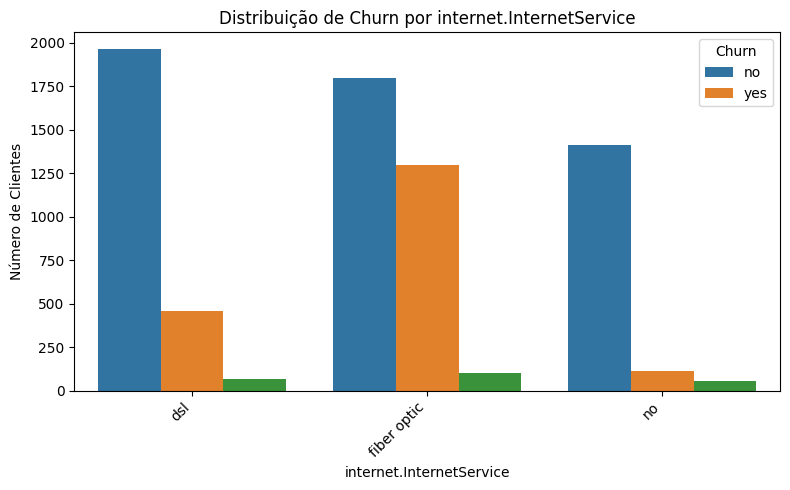

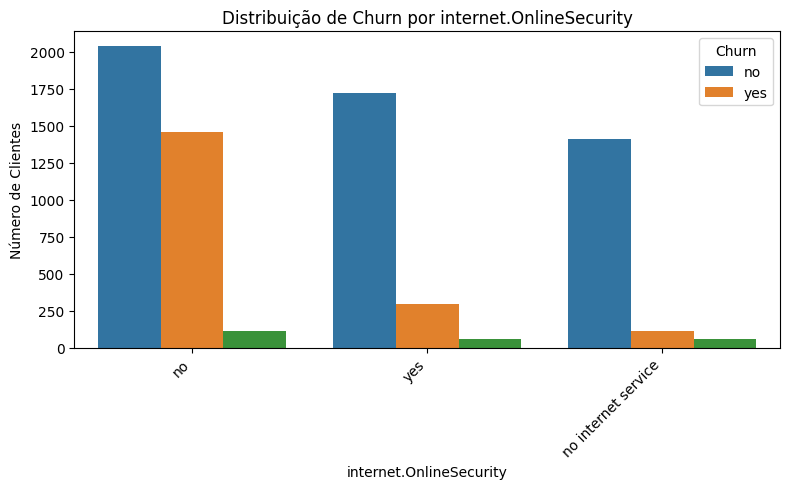

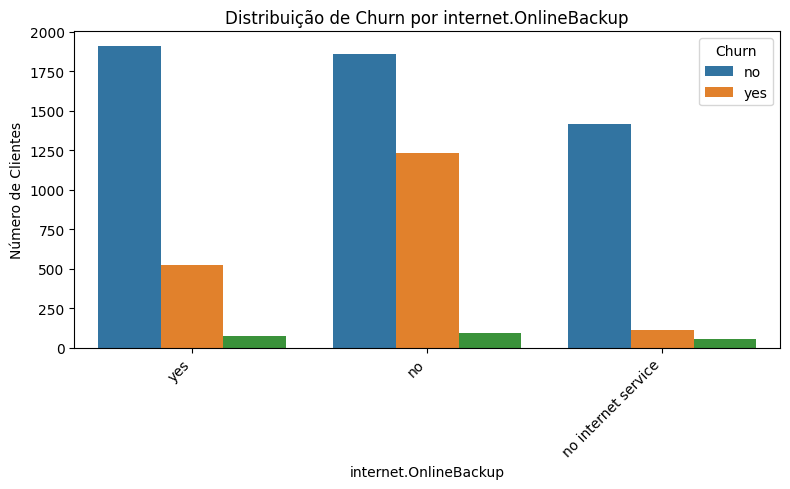

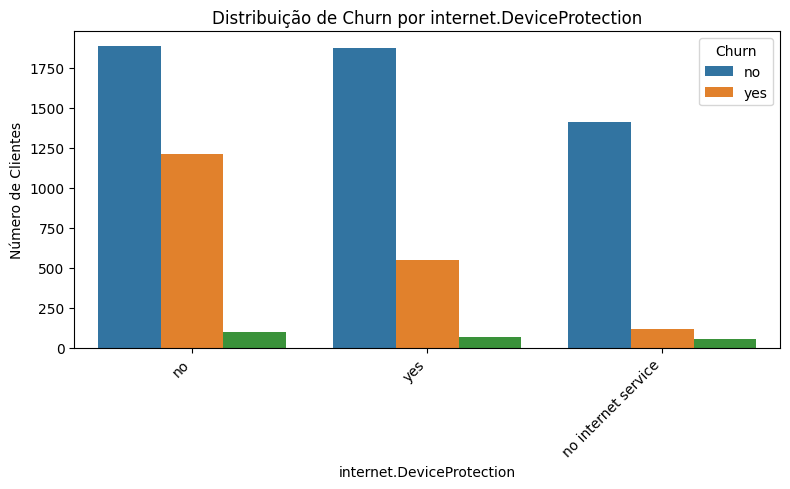

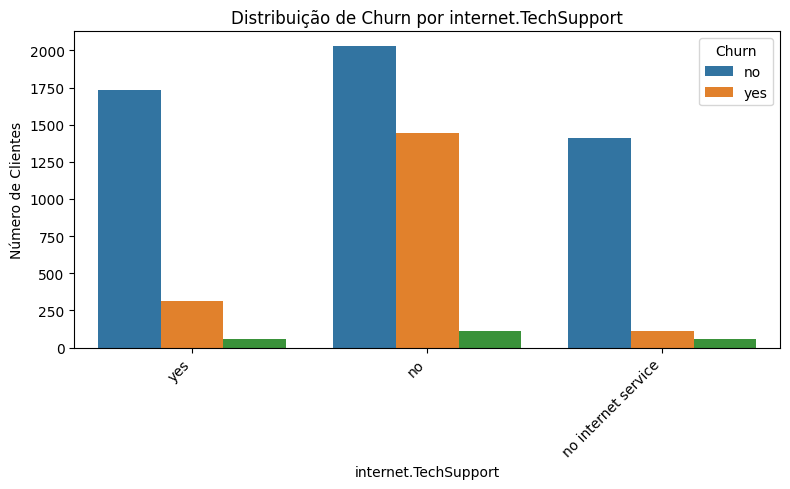

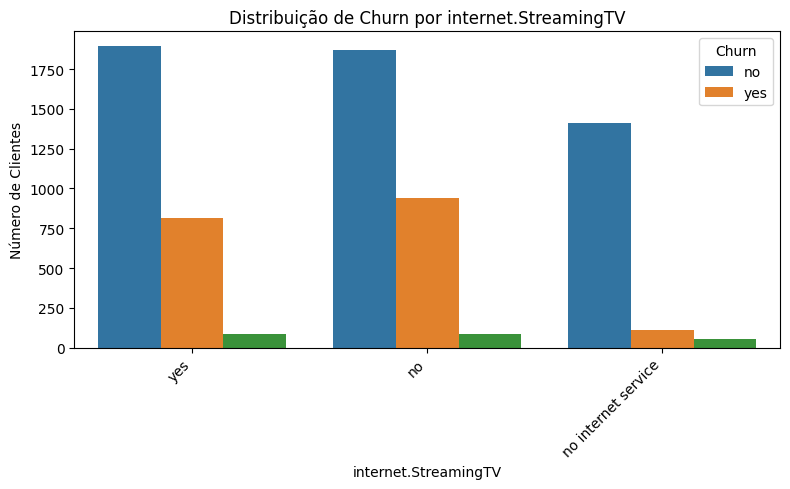

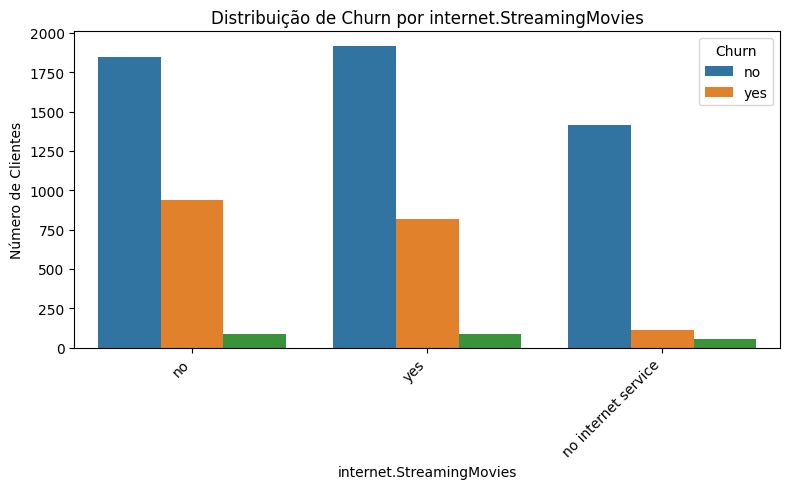

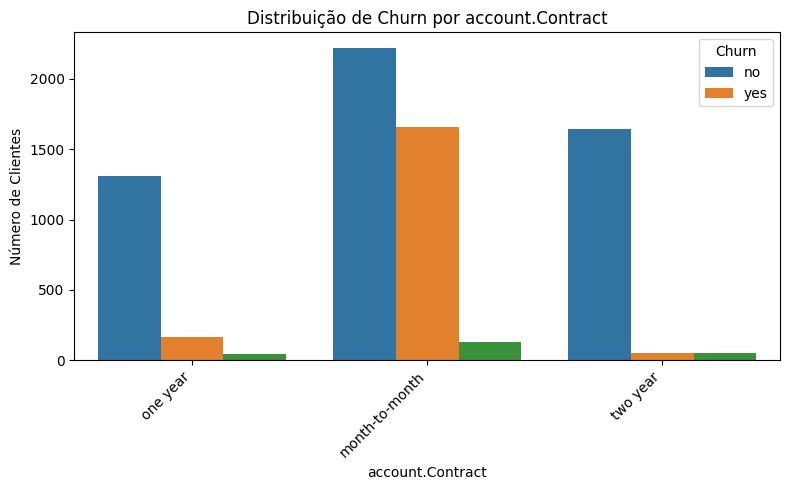

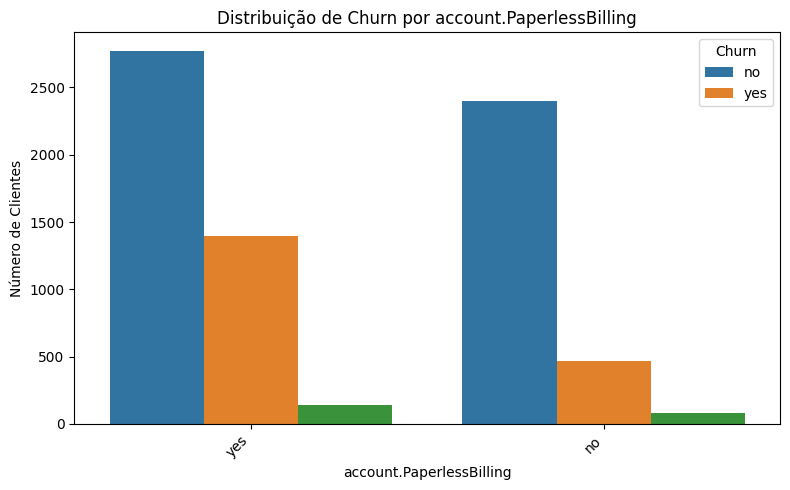

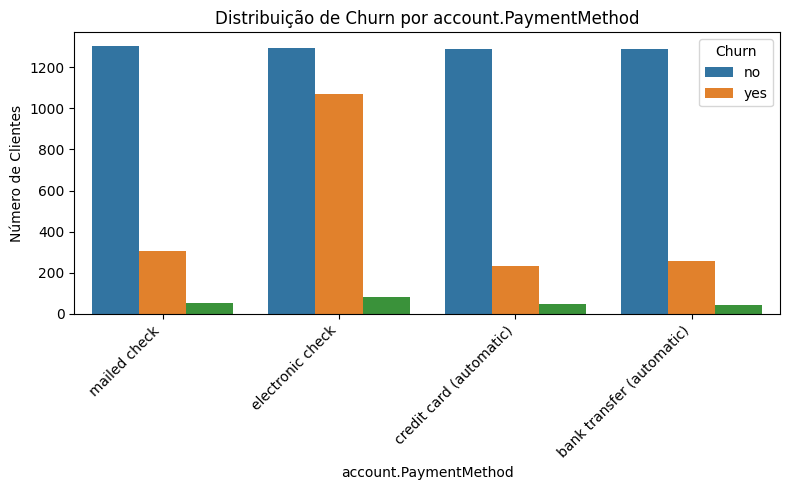

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['customer.gender', 'customer.Partner', 'customer.Dependents',
                    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
                    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue='Churn')
        plt.title(f'Distribuição de Churn por {col}')
        plt.xlabel(col)
        plt.ylabel('Número de Clientes')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

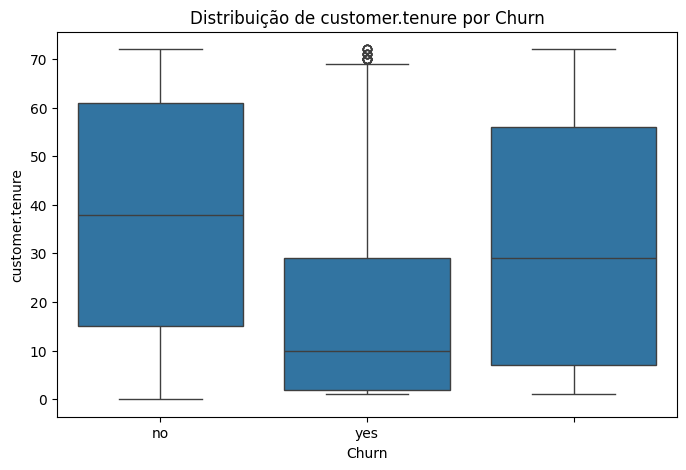

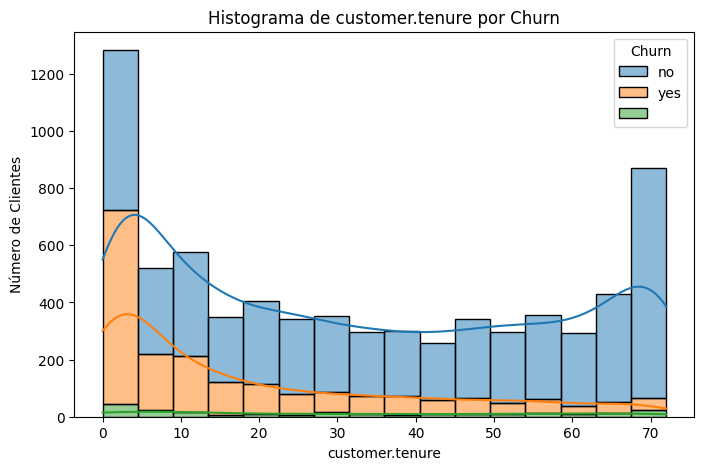

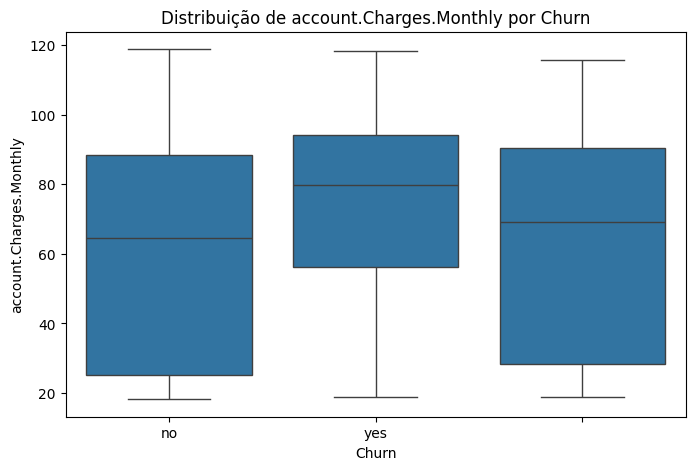

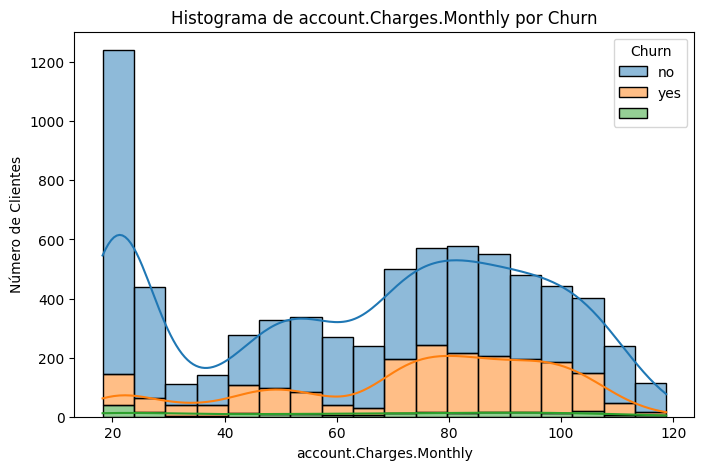

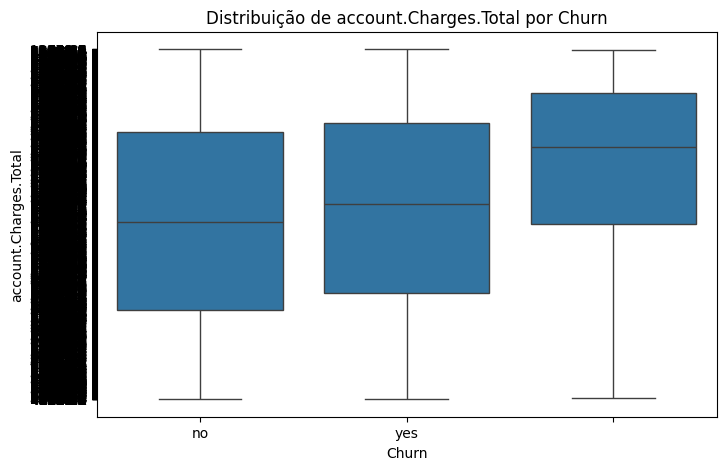

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


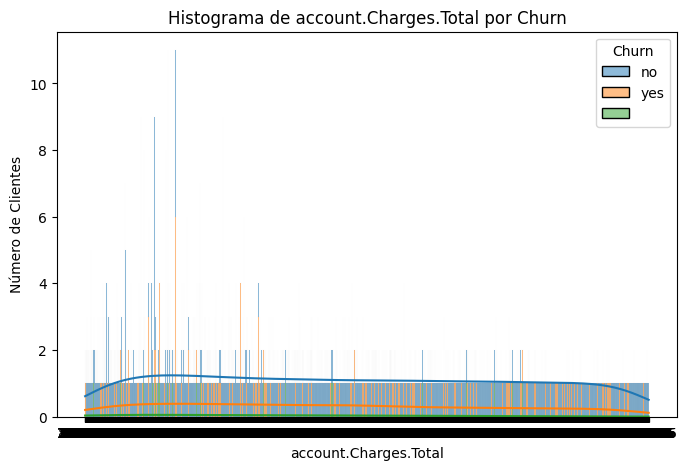

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x='Churn', y=col)
        plt.title(f'Distribuição de {col} por Churn')
        plt.xlabel('Churn')
        plt.ylabel(col)
        plt.show()

        plt.figure(figsize=(8, 5))
        sns.histplot(data=df, x=col, hue='Churn', multiple='stack', kde=True)
        plt.title(f'Histograma de {col} por Churn')
        plt.xlabel(col)
        plt.ylabel('Número de Clientes')
        plt.show()

# Relatório de Análise de Evasão de Clientes (Churn)

## Introdução

Este relatório apresenta uma análise exploratória do dataset TelecomX_Data, com o objetivo de entender o fenômeno da evasão de clientes (Churn) em uma empresa de telecomunicações. O Churn é um desafio significativo para empresas de serviços, pois a aquisição de novos clientes geralmente custa mais do que a retenção dos clientes existentes. A análise busca identificar padrões e fatores que contribuem para a evasão, fornecendo insights para estratégias de retenção mais eficazes.

## Limpeza e Tratamento de Dados

Os dados foram carregados a partir de um arquivo JSON hospedado no GitHub. Durante a etapa de limpeza e tratamento, foram realizadas as seguintes ações:

*   **Carregamento e Normalização:** Os dados foram importados utilizando a biblioteca `requests` para acessar o arquivo JSON e `pandas` para convertê-lo em um DataFrame. A função `pd.json_normalize` foi utilizada para lidar com as estruturas aninhadas no JSON, resultando em colunas flattenadas.
*   **Remoção de Duplicados:** Verificou-se e removeu-se registros duplicados no dataset.
*   **Ajuste de Colunas Numéricas:** A coluna 'account.Charges.Total' foi convertida para o tipo numérico (`float`), tratando possíveis erros de conversão com `errors='coerce'` e preenchendo valores ausentes (que podem representar clientes novos sem cobrança total) com 0. A coluna 'account.Charges.Monthly' também foi tratada.
*   **Criação da coluna Contas_Diarias**: Foi criada uma nova coluna 'Contas_Diarias' calculando a média diária do faturamento mensal.
*   **Ajuste de Colunas Categóricas:** As colunas do tipo 'object' foram padronizadas para letras minúsculas e espaços em branco removidos para garantir consistência nos valores categóricos.
*   **Tratamento de Valores Ausentes:** Foi realizada uma verificação e tratamento de valores ausentes.

## Análise Exploratória de Dados

A análise exploratória de dados (AED) foi conduzida para visualizar a distribuição das variáveis e identificar possíveis relações com o Churn.

### Distribuição de Churn

A distribuição da variável Churn (`fd2be5e0`) mostrou a proporção de clientes que cancelaram e que não cancelaram o serviço.

<div align="center">
  <img src="https://colab.research.googleusercontent.com/outputframe/asyncthetic_image.png?id=fd2be5e0-1755650753" width="400" height="300">
</div>

### Relação do Churn com Variáveis Categóricas

Foram gerados gráficos de barras (`5f9543e4`) para visualizar a distribuição de Churn em relação a diversas variáveis categóricas, como gênero, tipo de contrato, serviço de internet, etc. Esses gráficos (`5f9543e4`) revelaram insights sobre quais categorias apresentam maior ou menor taxa de evasão.

<div align="center">
  <img src="https://colab.research.googleusercontent.com/outputframe/asyncthetic_image.png?id=5f9543e4-1755650790" width="600" height="400">
</div>

### Relação do Churn com Variáveis Numéricas

A relação entre o Churn e variáveis numéricas como tempo de contrato (`customer.tenure`), gastos mensais (`account.Charges.Monthly`) e gastos totais (`account.Charges.Total`) foi explorada através de boxplots e histogramas (`113c4f97`). Esses gráficos ajudaram a identificar se valores mais altos ou mais baixos nessas variáveis estão associados a uma maior probabilidade de Churn.

<div align="center">
  <img src="https://colab.research.googleusercontent.com/outputframe/asyncthetic_image.png?id=113c4f97-1755650820" width="600" height="400">
</div>

## Conclusões e Insights

Com base na análise realizada, podemos destacar alguns insights importantes:

*   Clientes com **contratos de mês a mês** apresentam uma taxa de Churn significativamente maior em comparação com clientes com contratos de um ou dois anos.
*   Clientes que utilizam **serviços de internet de Fibra Ótica** parecem ter uma taxa de Churn maior do que aqueles com DSL ou sem serviço de internet.
*   Clientes com **menor tempo de contrato (tenure)** têm maior probabilidade de evadir. A taxa de Churn tende a diminuir à medida que o tempo de contrato aumenta.
*   Não houve diferença significativa na taxa de Churn entre **gêneros**.
*   Clientes com **Dependentes** ou **Parceiros** parecem ter menor taxa de Churn.
*   Clientes que utilizam **Pagamento Eletrônico** apresentaram maior taxa de Churn.
*   Clientes com **gastos mensais mais altos** parecem ter maior probabilidade de Churn.

Esses insights sugerem que o tipo de contrato, serviço de internet, tempo de contrato e método de pagamento são fatores importantes a serem considerados na previsão e prevenção do Churn.

## Recomendações

Com base nas conclusões da análise exploratória, as seguintes recomendações podem ser consideradas para reduzir a evasão de clientes:

*   **Programas de Fidelidade para Contratos Longos:** Incentivar clientes com contratos de mês a mês a migrarem para contratos de maior duração (um ou dois anos) através de descontos ou benefícios exclusivos.
*   **Melhoria na Qualidade do Serviço de Fibra Ótica:** Investigar as razões por trás da maior taxa de Churn entre usuários de fibra ótica e implementar melhorias na qualidade do serviço, suporte técnico ou comunicação.
*   **Estratégias de Retenção para Novos Clientes:** Focar em ações de engajamento e suporte nos primeiros meses de contrato para clientes com menor tempo de serviço.
*   **Análise Detalhada de Métodos de Pagamento:** Investigar se há problemas específicos associados ao método de pagamento eletrônico que possam estar contribuindo para o Churn.
*   **Ofertas Personalizadas:** Utilizar os insights da análise para criar ofertas personalizadas para clientes com maior risco de Churn, como descontos em serviços adicionais ou um atendimento mais proativo.

Este relatório fornece uma base sólida para entender o Churn. Para um modelo preditivo mais robusto, as próximas etapas envolveriam a preparação dos dados para modelagem, seleção e treinamento de modelos de machine learning e avaliação do desempenho.